In [1]:
# Utility
import numpy as np
import h5py
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the array of characters for amino acid residues
amino_acid_residues = [
    'A', 'C', 'E', 'D', 'G', 
    'F', 'I', 'H', 'K', 'M', 
    'L', 'N', 'Q', 'P', 'S', 
    'R', 'T', 'W', 'V', 'Y', 
    'X', '_'
]

# Define the array of characters for secondary structure labels
secondary_structure_labels = ['L', 'B', 'E', 'G', 'I', 'H', 'S', 'T', '_']

In [3]:
url = "https://github.com/amckenna41/DCBLSTM_PSP/raw/master/data/casp10.h5"    
data_path = os.path.join('../Data/Original/casp10.h5')

def download_casp10():
    print("\nDownloading CASP10 dataset...\n")
    response = requests.get(url, stream=True)
    response.raise_for_status()
    with open(data_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print("\nDataset downloaded successfully.")

def load_casp10():
    print("\nLoading CASP10 dataset...\n")
    with h5py.File(data_path, 'r') as casp10_data:
        # Load sequence features (one-hot encoding)
        data_hot = casp10_data['features'][:, :, :22]
        # Load secondary structure labels (one-hot Q8)
        labels_q8 = casp10_data['labels'][:, :, :9]

        # Convert sequence features from one-hot to string format
        data_hot = np.argmax(data_hot, axis=-1)
        data_hot = np.array([[amino_acid_residues[i] for i in seq] for seq in data_hot])
        # Convert Q8 labels from one-hot to string format
        labels_q8 = np.argmax(labels_q8, axis=-1)
        labels_q8 = np.array([[secondary_structure_labels[i] for i in seq] for seq in labels_q8])

        print("\nDataset loaded successfully.")
        return data_hot, labels_q8

# Check if the dataset file already exists
if os.path.exists(data_path):
    print("\nDataset already exists. Loading...\n")
else:
    # If the dataset file does not exist, download it
    try:
        download_casp10()
    except Exception as e:
        print(f"Error downloading dataset: {e}")
        exit(1)

# Load the CASP10 dataset
try:
    data_hot, labels_q8 = load_casp10()
    # Print the shapes of the loaded data
    print(f"Shape of data_hot: {data_hot.shape}")
    print(f"Shape of labels_q8: {labels_q8.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit(1)


Dataset already exists. Loading...


Loading CASP10 dataset...


Dataset loaded successfully.
Shape of data_hot: (123, 700)
Shape of labels_q8: (123, 700)


In [4]:
# Print the first 5 sequences and their corresponding labels
print("\nFirst 5 sequences and their corresponding labels:\n")
for i in range(5):
    print(f"Sequence {i+1}: {''.join(data_hot[i])}")
    print(f"Labels {i+1}: {''.join(labels_q8[i])}")
    print()


First 5 sequences and their corresponding labels:

Sequence 1: LLSTDIWVAALIRRAELGGAFATVARKGDARAGAVLVKAVDRREGTARLFSEATRGDGERFWMQPVRSTFEPDLDAYAERAARIDPDIWVVEIEDRDGRHFLTEPVESAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Labels 1: LLLHHHHHHHHHHHHHHTTLEEEEEELLLTTTLLEEEEEEETTTTEEEEEEEEELTTSLEEEELSLLLSSTHHHHHHHHHHHHHLTTLEEEEEEETTLLLLLLSLBLLLLLLLLLLLLLLLLL______________________________________________________________________________________________________

In [5]:
with h5py.File(data_path, 'r') as casp10_data:
    # Load sequence features (one-hot encoding)
    data_hot = casp10_data['features'][:, :, 0:21]
    print(casp10_data.keys())
    print(casp10_data['features'].shape)
    print(casp10_data['labels'].shape)
    print(data_hot.shape)
    

<KeysViewHDF5 ['features', 'labels']>
(123, 700, 43)
(123, 700, 9)
(123, 700, 21)


# Investigating the CASP10 Dataset
This section explores the structure of the CASP10 dataset, including its features, labels, and transformations applied during loading.

In [6]:
# Step 1: Inspect the structure of the HDF5 file
with h5py.File(data_path, 'r') as casp10_data:
    print("Keys in the dataset:", list(casp10_data.keys()))
    print("Shape of 'features':", casp10_data['features'].shape)
    print("Shape of 'labels':", casp10_data['labels'].shape)

Keys in the dataset: ['features', 'labels']
Shape of 'features': (123, 700, 43)
Shape of 'labels': (123, 700, 9)


### Step 2: Analyze the raw data
The dataset contains one-hot encoded features for amino acid residues and secondary structure labels. Let's examine a sample of the raw data.

In [7]:
# Step 2: View a sample of the raw data
with h5py.File(data_path, 'r') as casp10_data:
    raw_features = casp10_data['features'][:5, :, :22]  # First 5 sequences, amino acid features
    raw_labels = casp10_data['labels'][:5, :, :9]  # First 5 sequences, Q8 labels
    print("Raw features (first sequence):\n", raw_features[0])
    print("Raw labels (first sequence):\n", raw_labels[0])

Raw features (first sequence):
 [[0.         0.         0.         ... 0.         0.         0.14679   ]
 [0.         0.         0.         ... 0.         0.         0.00947104]
 [0.         0.         0.         ... 0.         0.         0.544879  ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Raw labels (first sequence):
 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


### Step 3: Convert one-hot encoded data to human-readable format
The one-hot encoded data is converted to amino acid residues and secondary structure labels using the predefined mappings.

In [8]:
# Step 3: Convert the raw one-hot encoding to single characters, handling padding explicitly
def one_hot_to_residues(one_hot_data, mapping):
    residues = []
    for seq in one_hot_data:
        converted_seq = []
        for vector in seq:
            if np.all(vector == 0):
                converted_seq.append('_')  # Explicitly handle padding
            else:
                converted_seq.append(mapping[np.argmax(vector)])
        residues.append(''.join(converted_seq))
    return residues

# Convert features and labels
with h5py.File(data_path, 'r') as casp10_data:
    raw_features = casp10_data['features'][:, :, :22]
    raw_labels = casp10_data['labels'][:, :, :9]

converted_features = one_hot_to_residues(raw_features, amino_acid_residues)
converted_labels = one_hot_to_residues(raw_labels, secondary_structure_labels)

# Print the first converted sequence and labels
print("Converted sequence (first):", converted_features[0])
print("Converted labels (first):", converted_labels[0])

Converted sequence (first): LLSTDIWVAALIRRAELGGAFATVARKGDARAGAVLVKAVDRREGTARLFSEATRGDGERFWMQPVRSTFEPDLDAYAERAARIDPDIWVVEIEDRDGRHFLTEPVES________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Converted labels (first): LLLHHHHHHHHHHHHHHTTLEEEEEELLLTTTLLEEEEEEETTTTEEEEEEEEELTTSLEEEELSLLLSSTHHHHHHHHHHHHHLTTLEEEEEEETTLLLLLLSLBLL_________________________________________________________________________________________________________________________________________

### Step 4: Investigate padding and 'NoSeq' markers
The dataset includes padding (`_`) to mark the end of sequences. Let's analyze how these markers are distributed.

In [9]:
# Step 4: Analyze padding in sequences and labels
def analyze_padding(data):
    padding_counts = [seq.count('_') for seq in data]
    print("Padding counts (first 5 sequences):", padding_counts[:5])

# Analyze padding in features and labels
analyze_padding(converted_features)
analyze_padding(converted_labels)

Padding counts (first 5 sequences): [592, 545, 532, 451, 673]
Padding counts (first 5 sequences): [592, 545, 532, 451, 673]


### Step 5: Clean sequences and labels by removing padding
To ensure consistency, we remove padding (`_`) from the sequences and labels.

In [10]:
# Step 5: Remove padding from sequences and labels
def remove_padding(data):
    return [''.join([char for char in seq if char != '_']) for seq in data]

cleaned_features = remove_padding(converted_features)
cleaned_labels = remove_padding(converted_labels)

# Print cleaned sequences and labels
print("Cleaned sequence (first):", cleaned_features[0])
print("Cleaned labels (first):", cleaned_labels[0])

Cleaned sequence (first): LLSTDIWVAALIRRAELGGAFATVARKGDARAGAVLVKAVDRREGTARLFSEATRGDGERFWMQPVRSTFEPDLDAYAERAARIDPDIWVVEIEDRDGRHFLTEPVES
Cleaned labels (first): LLLHHHHHHHHHHHHHHTTLEEEEEELLLTTTLLEEEEEEETTTTEEEEEEEEELTTSLEEEELSLLLSSTHHHHHHHHHHHHHLTTLEEEEEEETTLLLLLLSLBLL


### Step 6: Verify alignment between sequences and labels
Ensure that the lengths of the cleaned sequences and labels match.

In [11]:
# Step 6: Verify alignment
for i in range(5):
    assert len(cleaned_features[i]) == len(cleaned_labels[i]), f"Mismatch in sequence {i+1}"
    print(f"Sequence {i+1} and labels are aligned (length: {len(cleaned_features[i])})")

Sequence 1 and labels are aligned (length: 108)
Sequence 2 and labels are aligned (length: 155)
Sequence 3 and labels are aligned (length: 168)
Sequence 4 and labels are aligned (length: 249)
Sequence 5 and labels are aligned (length: 27)


In [12]:
def convert_8state_to_3state(ss):
    ss_3state = ""
    for s in ss:
        if s in ['H', 'G', 'I']:
            ss_3state += 'H'
        elif s in ['E', 'B']:
            ss_3state += 'E'
        else:
            ss_3state += 'C'
    return ss_3state

### Step 7: Save the cleaned data as CSV files

In [13]:
dataset_dir = '../Data/Preprocessed/'

In [14]:
# Create a list to store the combined data
combined_data = []

for i in range(len(cleaned_features)):
    # Get the sequence and labels
    sequence = cleaned_features[i]
    dssp8 = cleaned_labels[i]
    dssp3 = convert_8state_to_3state(dssp8)
    
    combined_data.append({
        "length": len(sequence), 
        "residue": sequence, 
        "dssp8": dssp8, 
        "dssp3": dssp3
        })

df = pd.DataFrame(combined_data)
# df.to_csv(dataset_dir + 'CASP10_preprocessed.csv', index_label='id')

# EDA for casp10 Dataset
Goal: Perform exploratory data analysis (EDA) on the casp10 dataset to understand the dataset format and the frequency of secondary structure elements in the dataset.

In [15]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
file_dir = '../Data/preprocessed/casp10_preprocessed.csv'
df_ori = pd.read_csv(file_dir, sep=',', header=0)
df_ori

,id,length,residue,dssp8,dssp3
0,0,108,LLSTDIWVAALIRRAELGGAFATVARKGDARAGAVLVKAVDRREGT...,LLLHHHHHHHHHHHHHHTTLEEEEEELLLTTTLLEEEEEEETTTTE...,CCCHHHHHHHHHHHHHHCCCEEEEEECCCCCCCCEEEEEEECCCCE...
1,1,155,AEVGYPLSWLKDKHPIEEPDLEYSLKWFKKHEYDLETSKLQEVSEK...,LLLBTTHHHHHHHSLLLLLLLSSLHHHHHHHGGGSLHHHHHHHHHH...,CCCECCHHHHHHHCCCCCCCCCCCHHHHHHHHHHCCHHHHHHHHHH...
2,2,168,GYGQRLLAKQMESMIEEAISQAAENYYIQGDIIIPEEWQDIPVEEI...,LHHHHHHHHHHHHHHHHHHHHHBSSEEEEEELLLLGGGTTSLHHHH...,CHHHHHHHHHHHHHHHHHHHHHECCEEEEEECCCCHHHCCCCHHHH...
3,3,249,MNLVQDKVTIITGGTRGIGFAAAKIFIDNGAKVSIFGETQEEVDTA...,LLTTTTLEEEETTLSSHHHHHHHHHHHHTTLEEEEELSSHHHHHHH...,CCCCCCCEEEECCCCCHHHHHHHHHHHHCCCEEEEECCCHHHHHHH...
4,4,27,ECHLCPVCGESFASKGAQERHLRLLHA,LLEELTTSLLEESSHHHHHHHHHTTLL,CCEECCCCCCEECCHHHHHHHHHCCCC
...,...,...,...,...,...
118,118,303,SPVRVENGVLTEVLKGHNEIILPNSVKSIPKAAFRGSQINKVVLNE...,LLEEEETTEEEEELSSLSEEELLTTLLEELTTTTTTLLLSEEELLT...,CCEEEECCEEEEECCCCCEEECCCCCCEECCCCCCCCCCCEEECCC...
119,119,100,MIDLAPLVRRLAGTPLAEWANGLQAQLDTKMSKGHGDLQRWQSALD...,LLLLHHHHHHHTTSTTHHHHHHHHHHHHHHHHHTHHHHHTTHHHHH...,CCCCHHHHHHHCCCCCHHHHHHHHHHHHHHHHHCHHHHHCCHHHHH...
120,120,106,DLKGIWQLCHYVSALKPSNTFKVLSDDGRIVNFTIIPGADAIITGY...,LLLEEEEEEEELLLEEEEEEEEEELTTSEEEEEELLTTSLLEEEEE...,CCCEEEEEEEECCCEEEEEEEEEECCCCEEEEEECCCCCCCEEEEE...
121,121,173,DDTRYLVGAVPEVDGKVVFSKEFQIPGMSQAQIYDTMTKWMDERLK...,LLGGGSTTSSLEETTEELEEEEEELTTSLHHHHHHHHHHHHHHHHH...,CCHHHCCCCCCEECCEECEEEEEECCCCCHHHHHHHHHHHHHHHHH...


In [23]:
# get only the first column
df = pd.DataFrame(df_ori['residue'])
df

,residue
0,LLSTDIWVAALIRRAELGGAFATVARKGDARAGAVLVKAVDRREGT...
1,AEVGYPLSWLKDKHPIEEPDLEYSLKWFKKHEYDLETSKLQEVSEK...
2,GYGQRLLAKQMESMIEEAISQAAENYYIQGDIIIPEEWQDIPVEEI...
3,MNLVQDKVTIITGGTRGIGFAAAKIFIDNGAKVSIFGETQEEVDTA...
4,ECHLCPVCGESFASKGAQERHLRLLHA
...,...
118,SPVRVENGVLTEVLKGHNEIILPNSVKSIPKAAFRGSQINKVVLNE...
119,MIDLAPLVRRLAGTPLAEWANGLQAQLDTKMSKGHGDLQRWQSALD...
120,DLKGIWQLCHYVSALKPSNTFKVLSDDGRIVNFTIIPGADAIITGY...
121,DDTRYLVGAVPEVDGKVVFSKEFQIPGMSQAQIYDTMTKWMDERLK...


In [24]:
# From the first column
# Check the percentage of unknown sequences (X or !) for each protein
def check_unknowns(df):
    """
    Check the percentage of unknown sequences (X or !) for each protein
    """
    # Get the sequence
    seq = df.iloc[:, 0]
    # Get the number of unknowns
    unknowns = seq.str.count('X') + seq.str.count('!')
    # Calculate the percentage of unknowns
    unknowns = unknowns / seq.str.len() * 100
    return unknowns

# Add the unknowns to the dataframe
df['unknown(%)'] = check_unknowns(df)
df

,residue,unknown(%)
0,LLSTDIWVAALIRRAELGGAFATVARKGDARAGAVLVKAVDRREGT...,0.0
1,AEVGYPLSWLKDKHPIEEPDLEYSLKWFKKHEYDLETSKLQEVSEK...,0.0
2,GYGQRLLAKQMESMIEEAISQAAENYYIQGDIIIPEEWQDIPVEEI...,0.0
3,MNLVQDKVTIITGGTRGIGFAAAKIFIDNGAKVSIFGETQEEVDTA...,0.0
4,ECHLCPVCGESFASKGAQERHLRLLHA,0.0
...,...,...
118,SPVRVENGVLTEVLKGHNEIILPNSVKSIPKAAFRGSQINKVVLNE...,0.0
119,MIDLAPLVRRLAGTPLAEWANGLQAQLDTKMSKGHGDLQRWQSALD...,0.0
120,DLKGIWQLCHYVSALKPSNTFKVLSDDGRIVNFTIIPGADAIITGY...,0.0
121,DDTRYLVGAVPEVDGKVVFSKEFQIPGMSQAQIYDTMTKWMDERLK...,0.0


In [25]:
# Replace the unknown structure with A sequence
def replace_unknowns(df):
    """
    Replace the unknown structure with A sequence
    """
    # Get the sequence
    seq = df.iloc[:, 0]
    # Replace the unknowns with A
    seq = seq.str.replace('X', 'A')
    seq = seq.str.replace('!', 'A')
    return seq
# Add the unknowns to the dataframe
df['residue'] = replace_unknowns(df)
df

,residue,unknown(%)
0,LLSTDIWVAALIRRAELGGAFATVARKGDARAGAVLVKAVDRREGT...,0.0
1,AEVGYPLSWLKDKHPIEEPDLEYSLKWFKKHEYDLETSKLQEVSEK...,0.0
2,GYGQRLLAKQMESMIEEAISQAAENYYIQGDIIIPEEWQDIPVEEI...,0.0
3,MNLVQDKVTIITGGTRGIGFAAAKIFIDNGAKVSIFGETQEEVDTA...,0.0
4,ECHLCPVCGESFASKGAQERHLRLLHA,0.0
...,...,...
118,SPVRVENGVLTEVLKGHNEIILPNSVKSIPKAAFRGSQINKVVLNE...,0.0
119,MIDLAPLVRRLAGTPLAEWANGLQAQLDTKMSKGHGDLQRWQSALD...,0.0
120,DLKGIWQLCHYVSALKPSNTFKVLSDDGRIVNFTIIPGADAIITGY...,0.0
121,DDTRYLVGAVPEVDGKVVFSKEFQIPGMSQAQIYDTMTKWMDERLK...,0.0


In [26]:
# Check again the percentage of unknown sequences (X or !) for each protein
df.loc[:, 'unknown(%)'] = check_unknowns(df)
df

,residue,unknown(%)
0,LLSTDIWVAALIRRAELGGAFATVARKGDARAGAVLVKAVDRREGT...,0.0
1,AEVGYPLSWLKDKHPIEEPDLEYSLKWFKKHEYDLETSKLQEVSEK...,0.0
2,GYGQRLLAKQMESMIEEAISQAAENYYIQGDIIIPEEWQDIPVEEI...,0.0
3,MNLVQDKVTIITGGTRGIGFAAAKIFIDNGAKVSIFGETQEEVDTA...,0.0
4,ECHLCPVCGESFASKGAQERHLRLLHA,0.0
...,...,...
118,SPVRVENGVLTEVLKGHNEIILPNSVKSIPKAAFRGSQINKVVLNE...,0.0
119,MIDLAPLVRRLAGTPLAEWANGLQAQLDTKMSKGHGDLQRWQSALD...,0.0
120,DLKGIWQLCHYVSALKPSNTFKVLSDDGRIVNFTIIPGADAIITGY...,0.0
121,DDTRYLVGAVPEVDGKVVFSKEFQIPGMSQAQIYDTMTKWMDERLK...,0.0


In [29]:
# Check if the secondary structure sequences in the dataset are in correct format
def check_secondary_structure_format(ss_seq):
    """
    Check if the secondary structure sequences in the dataset are in correct format
    """
    # Check if the sequences are in correct format
    for seq in ss_seq:
        for char in seq:
            if char not in secondary_structure_labels:
                print(
                    f"Invalid character '{char}' found in secondary structure sequence: {seq}"
                )
                return False
    return True
# Check the secondary structure format
print(check_secondary_structure_format(df_ori.iloc[:, 3]))

True


In [31]:
# Visualize the data distribution for secondary structure labels
# Get the counts of each secondary structure label
def get_counts(df):
    """
    Get the counts of each secondary structure label
    """
    # Get the 8 state secondary structures
    dssp8 = df['dssp8']
    counts = []
    # Get the counts of each secondary structure label
    for i in range(len(secondary_structure_labels)):
        label = secondary_structure_labels[i]
        n = dssp8.str.count(label)
        counts.append([label, n.sum()])
    return counts
# Get the counts of each secondary structure label
counts = get_counts(df_ori)
# Create a dataframe with the counts
df_counts = pd.DataFrame(counts,
                         columns=['label', 'counts'])
df_counts

,label,counts
0,L,4652
1,B,227
2,E,5225
3,G,797
4,I,5
5,H,6544
6,S,1780
7,T,2811
8,_,0


L: 4652
B: 227
E: 5225
G: 797
I: 5
H: 6544
S: 1780
T: 2811
_: 0


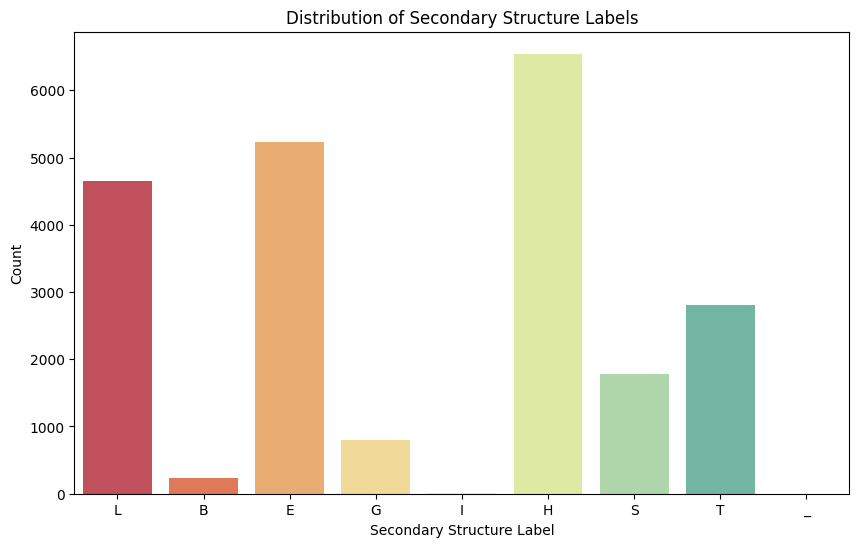

In [32]:
# Plot the distribution of secondary structure labels
def plot_distribution(df_counts):
    """
    Plot the distribution of secondary structure labels
    """
    for i, label in enumerate(secondary_structure_labels):
        n = df_counts[df_counts['label'] == label]['counts'].values[0]
        print(f'{label}: {n}')

    plt.figure(figsize=(10, 6))
    sns.barplot(x='label',
                y='counts',
                palette='Spectral',
                hue='label',
                data=df_counts)
    plt.title('Distribution of Secondary Structure Labels')
    plt.xlabel('Secondary Structure Label')
    plt.ylabel('Count')
    plt.show()

plot_distribution(df_counts)